<a href="https://colab.research.google.com/github/karthiksankarangit/capstone_project/blob/develop/Capstone_Project_v1_0_4_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **What is Pneumonia?**

*  Pneumonia is an infection in one or both lungs. Bacteria, viruses, and fungi cause it. The infection causes inflammation in the air sacs in your lungs, which are called alveoli.
*   The alveoli fill with fluid or pus, making it difficult to breathe.Pneumonia is a lung infection that can range from mild to so severe that you have to go to the hospital.


---


Pneumonia accounts for over 15% of all deaths of children under 5 years old internationally. In 2017, 920,000 children under the age of 5 died from the disease. It requires review of a chest radiograph (CXR) by highly trained specialists and confirmation through clinical history, vital signs and laboratory exams. Pneumonia usually manifests as an area or areas of increased opacity on CXR. However, the diagnosis of pneumonia on CXR is complicated because of a number of other conditions in the lungs such as fluid overload (pulmonary edema), bleeding, volume loss (atelectasis or collapse), lung cancer, or post-radiation or surgical changes. Outside of the lungs, fluid in the pleural space (pleural effusion) also appears as increased opacity on CXR. When available, comparison of CXRs of the patient taken at different time points and correlation with clinical symptoms and history are helpful in making the diagnosis.

CXRs are the most commonly performed diagnostic imaging study. A number of factors such as positioning of the patient and depth of inspiration can alter the appearance of the CXR, complicating interpretation further. In addition, clinicians are faced with reading high volumes of images every shift.


---









# **Pneumonia Detection**
Now to detect Pneumonia, we need to detect Inflammation of the lungs. In this project, you’re challenged to build an algorithm to detect a visual signal for pneumonia in medical images. Specifically, your algorithm needs to automatically locate lung opacities on chest radiographs.

# **How Is Pneumonia Diagnosed?**
Sometimes pneumonia can be difficult to diagnose because the symptoms are so variable, and are often very similar to those seen in a cold or influenza. To diagnose pneumonia, and to try to identify the germ that is causing the illness, your doctor will ask questions about your medical history, do a physical exam, and run some tests.

# **Business Domain Value**


*   Automating Pneumonia screening in chest radiographs, providing affected area details through bounding box.
*   Assist physicians to make better clinical decisions or even replace human judgement in certain functional areas of healthcare (eg, radiology).


*   Guided by relevant clinical questions, powerful AI techniques can unlock clinically relevant information hidden in the massive amount of data, which in turn can assist clinical decision making.











#  **What Does a Normal Image Look Like?**

This is an illustration of the chest anatomy with the lungs highlighted - 

![Chest Anatomy](https://i.imgur.com/Jb9OmxM.jpg)

*Credit: MDGRPHCS / Shutterstock.com*


---

---








You can see that there is a mass of tissue surrounding the lungs and between the lungs. These areas contain skin, muscles, fat, bones, and also the heart and big blood vessels. That translates into a lot of information on the chest radiograph that is not useful for this competition.


# **Project Description**
In this capstone project, the goal is to build a pneumonia detection system, to locate the position of inflammation in an image. 

Tissues with sparse material, such as lungs which are full of air, do not absorb the X-rays and appear black in the image. 

Dense tissues such as bones absorb X-rays and appear white in the image.

While we are theoretically detecting **“lung opacities”**, there are lung opacities that are not pneumonia related.

# **The Definition of Opacity**


*   Opacity is a pretty loose term - *"Opacity refers to any area that preferentially attenuates the x-ray beam and therefore appears more opaque than the surrounding area. It is a nonspecific term that does not indicate the size or pathologic nature of the abnormality" - from Felson's Principles of Chest Roentgenology (Fourth Edition).*

Meaning - Any area in the chest radiograph that is more white than it should be. If you compare the images of Sample Patient 1 and Sample Patient 2 you can see that the lower boundry of the lungs of patient 2 is obscured by opacities. In the image of Sample Patient 1 you can see the clear difference between the black lungs and the tissue below it, and in the image of Sample Patient 2 there is just this fuzziness.



---



What are opacities and what can we understand if we see them?


---


*   Usually the lungs are full of air. When someone has pneumonia, the air in the lungs is replaced by other material - fluids, bacteria, immune system cells, etc. That's why areas of opacities are areas that are grey but should be more black. When we see them we understand that the lung tissue in that area is probably not healthy.


# **Data fields**
* patientId _- A patientId. Each patientId corresponds to a unique image.
* x_ - the upper-left x coordinate of the bounding box.
* y_ - the upper-left y coordinate of the bounding box.
* width_ - the width of the bounding box.
* height_ - the height of the bounding box.
* Target_ - the binary Target, indicating whether this sample has evidence of pneumonia.

# **Prediction Output**
In this project, we have to predict whether pneumonia exists in a given image. This is done by predicting bounding boxes around areas of the lung. Samples without bounding boxes are negative and contain no definitive evidence of pneumonia. Samples with bounding boxes indicate evidence of pneumonia.

When making predictions, the model should predict as many bounding boxes as necessary, in the format: confidence x-min y-min width height

`{patientId,{confidence x-min y-min width height},{confidence x-min y-min width height}}`, etc.

# 1. Importing necessary libraries

In [1]:
#install the supported binaries
#Kaggle
!pip install -q kaggle
#DICOM
!pip install -q pydicom

     |████████████████████████████████| 1.9MB 16.5MB/s 


In [3]:
#Supress warnings
import warnings
warnings.filterwarnings('ignore')
import numpy as np
#Google drive
from google.colab import drive
from google.colab import files
#OS
import os
import gc
#pandas
import pandas as pd
#plots
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#dicom
import pydicom as dcm
#glob
from glob import glob
#tqdm
from tqdm import tqdm_notebook
#Feature selection
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from matplotlib.patches import Rectangle

# 2. Folder mounting from GDrive

In [4]:
#mount the drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [5]:
#Target Folders
projectFolder = '/content/drive/My Drive/GL_AI_ML/Assignments/Capstone'
dataSetFolder = 'dataset'
train_img_folder ='stage_2_train_images'
test_img_folder='stage_2_test_images'
dicom_meta_data_file='Pneumonia_matadata.csv'

#  3. Download dataset from Kaggle and store in the Drive
#### * Do not execute this if dataset is already downloaded

In [ ]:
#Create the required directory
! mkdir ~/.kaggle

In [ ]:
#Upload the files : kaggle.json
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"karthiksankaran87","key":"72f812099595ca494cec2f0d93bfde9e"}'}

In [ ]:
#Copy the file
!cp kaggle.json ~/.kaggle/

In [ ]:
#Change the permission
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#Install the kaggle
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 2.9MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.10-cp36-none-any.whl size=73269 sha256=c50b1ddf763bc02e77d99c38c5bb5a4af364ea242b2657e0f6b9c6a35403b083
  Stored in directory: /root/.cache/pip/wheels/3a/d1/7e/6ce09b72b770149802c653a02783821629146983ee5a360f10
Successfully built kaggle
  Found existing installation: kaggle 1.5.10
    Uninstalling kaggle-1.5.10:
      Successfully uninstalled kaggle-1.5.10


In [ ]:
#Download the required dataset
!kaggle competitions download -c rsna-pneumonia-detection-challenge

100% 3.66G/3.66G [00:45<00:00, 37.4MB/s]
100% 3.66G/3.66G [00:45<00:00, 87.0MB/s]


In [ ]:
!ls

rsna-pneumonia-detection-challenge.zip


In [ ]:
 #Move the dataset
 !mv rsna-pneumonia-detection-challenge.zip projectFolder 

In [ ]:
#Change the directory and create the folder to 
os.chdir(projectFolder)
!mkdir dataSetFolder

In [ ]:

#Unzip the files to the required folder
!unzip rsna-pneumonia-detection-challenge.zip -d dataSetFolder

Streaming output truncated to the last 5000 lines.
  inflating: dataset/stage_2_train_images/d5231546-354e-4071-9af1-6644beabfd86.dcm  
  inflating: dataset/stage_2_train_images/d5252a78-3ea1-48e9-9ffb-e7535be3ce80.dcm  
  inflating: dataset/stage_2_train_images/d525eafb-8908-45fd-a942-48d07c435487.dcm  
  inflating: dataset/stage_2_train_images/d5265640-17db-4880-866d-d2952e32941c.dcm  
  inflating: dataset/stage_2_train_images/d5277276-f8f8-40e9-b8e1-791cf5d96ac0.dcm  
  inflating: dataset/stage_2_train_images/d528d9e9-647a-4e2e-a16c-bd5e32a5bbf5.dcm  
  inflating: dataset/stage_2_train_images/d5293a3e-f050-4b98-8bbf-1f40e25bced5.dcm  
  inflating: dataset/stage_2_train_images/d52cbb5a-1d0a-457d-8c72-0f7aeec21ca7.dcm  
  inflating: dataset/stage_2_train_images/d52ce67b-be7c-4349-8dc4-38562928d208.dcm  
  inflating: dataset/stage_2_train_images/d535a3c8-c4a4-4856-b5cd-17f6332eac8b.dcm  
  inflating: dataset/stage_2_train_images/d5360dc4-6bea-4a7b-bc49-5b2547ad7877.dcm  
  inflating: d

# 4.  Change the working directory

In [6]:
os.chdir(projectFolder)

In [7]:
!ls

dataset  output  rsna-pneumonia-detection-challenge.zip


### 4.1. Navigate to the folder which contains the dataset and read the csv files

In [8]:
print('Reading datasets (.csv files) from the folder/',dataSetFolder,'..'*20)
train_labels = pd.read_csv(dataSetFolder+'/stage_2_train_labels.csv')
class_info = pd.read_csv(dataSetFolder+'/stage_2_detailed_class_info.csv')

Reading datasets (.csv files) from the folder/ dataset ........................................


### 4.2. Displays the information about the dataset

In [9]:
train_labels.head()

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1


In [ ]:
print('Count of the labels :',train_labels.count()[0])

Count of the labels : 30227


In [ ]:
class_info.head()

,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity


In [ ]:
print('Count of the class info:',class_info.count()[0])

Count of the class info: 30227


In [ ]:
# Merge the above data information into one dataframe
merge_df = pd.merge(left = class_info, right = train_labels, how = 'left', on = 'patientId')

In [ ]:
print('Count  :',merge_df.count()[0])

Count  : 37629


### 4.3. Checking NULL values

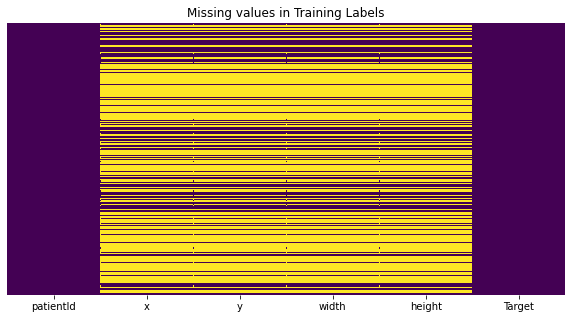

In [ ]:
fig = plt.figure(figsize = (10, 5))
sns.heatmap(train_labels.isnull(),yticklabels=False,cbar=False,cmap='viridis').set_title("Missing values in Training Labels")
plt.show()

In [ ]:
missing_df = pd.DataFrame(train_labels.isnull().sum())
missing_df.columns=['Total missing values']
print('Displaying the NULL counts for Labels.......')
missing_df.T

Displaying the NULL counts for Labels.......


,patientId,x,y,width,height,Target
Total missing values,0,20672,20672,20672,20672,0


#### Observation:
* Missing values (yellow) in x, y, width and height indicates absence of Pneumonia's evidence(target label is 0 for those records)

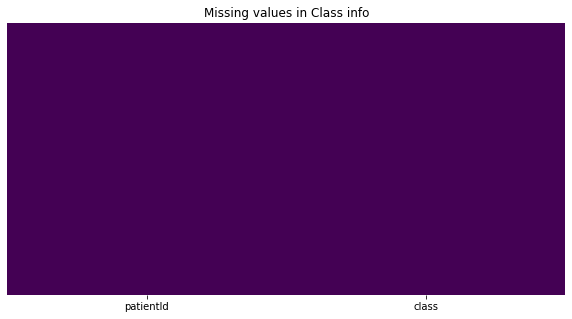

In [ ]:
fig = plt.figure(figsize = (10, 5))
sns.heatmap(class_info.isnull(),yticklabels=False,cbar=False,cmap='viridis').set_title("Missing values in Class info")
plt.show()

In [ ]:
print('Displaying the NULL counts for Class.......')
missing_df1 = pd.DataFrame(class_info.isnull().sum())
missing_df1.columns=['Total missing values']
missing_df1.T

Displaying the NULL counts for Class.......


,patientId,class
Total missing values,0,0


#### Observation:
* There are  <font color ='Green'> <b>no missing values</b> </font>

# 5. Visualization of different classes

#### 5.1. Distribution of Target (0, 1) and Class(No Lung Opacity / Not Normal / Lung Opacity)

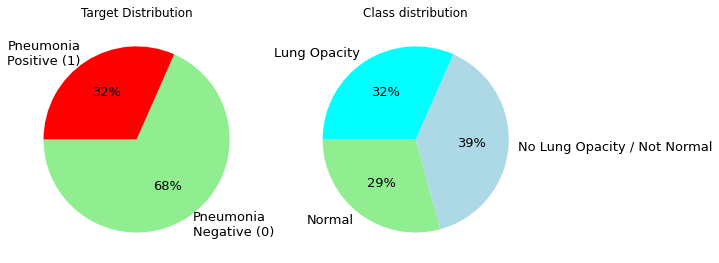

In [ ]:
#Plot the distribution
fig = plt.figure(figsize = (10, 5))
fig_plot = fig.add_subplot(121)
fig_graph = (train_labels['Target'].value_counts()
    .plot(kind = 'pie', autopct = '%.0f%%', 
          labels = ['Pneumonia\nNegative (0)', 'Pneumonia\nPositive (1)'], 
          colors = ['lightgreen', 'red'], 
          startangle = 180, 
          title = 'Target Distribution', fontsize = 13)
    .set_ylabel(''))

fig_plot = fig.add_subplot(122)
fig_graph = (class_info['class'].value_counts().sort_index(ascending = False)
    .plot(kind = 'pie', autopct = '%.0f%%', 
          colors = ['lightgreen', 'lightblue', 'aqua'], 
          startangle = 180, title = 'Class distribution', 
          fontsize = 13)
    .set_ylabel(''))
plt.tight_layout()

#### Observation :
* 68 % of the data in train label datasets supports non existence of Pneumonia
* Lung opacity and No Lung Opacity/Not normal are almost equally distributed as per the class info dataset

#### 5.2. Get the unique patient id's from the given dataset

In [ ]:
# Get the repeated patient id's
repeated_patient_ids = train_labels.groupby('patientId').size()
repeated_patient_ids

patientId
0004cfab-14fd-4e49-80ba-63a80b6bddd6    1
000924cf-0f8d-42bd-9158-1af53881a557    1
000db696-cf54-4385-b10b-6b16fbb3f985    2
000fe35a-2649-43d4-b027-e67796d412e0    2
001031d9-f904-4a23-b3e5-2c088acd19c6    2
                                       ..
fffb2395-8edd-4954-8a89-ffe2fd329be3    2
fffba05a-1635-4545-9bbd-57ad4cfe8d27    1
fffc95b5-605b-4226-80ab-62caec682b22    1
fffcff11-d018-4414-971a-a7cefa327795    1
fffec09e-8a4a-48b1-b33e-ab4890ccd136    1
Length: 26684, dtype: int64

In [ ]:
print('Number of Unique patient IDs in the dataset: {}'.format(len(repeated_patient_ids)))

Number of Unique patient IDs in the dataset: 26684


#### Observation : 
* There are 26684 unique patient id's are available as part of the given dataset

#### 5.3. Check for the boundary boxes against the patient

In [ ]:
bounding_boxes= repeated_patient_ids.to_frame('number_of_boxes').reset_index()
bounding_boxes

,patientId,number_of_boxes
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,1
1,000924cf-0f8d-42bd-9158-1af53881a557,1
2,000db696-cf54-4385-b10b-6b16fbb3f985,2
3,000fe35a-2649-43d4-b027-e67796d412e0,2
4,001031d9-f904-4a23-b3e5-2c088acd19c6,2
...,...,...
26679,fffb2395-8edd-4954-8a89-ffe2fd329be3,2
26680,fffba05a-1635-4545-9bbd-57ad4cfe8d27,1
26681,fffc95b5-605b-4226-80ab-62caec682b22,1
26682,fffcff11-d018-4414-971a-a7cefa327795,1


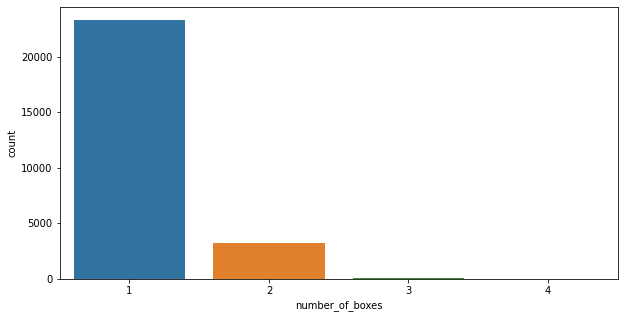

In [ ]:
plt.figure(figsize = (10, 5))
sns.countplot(x = 'number_of_boxes', 
              data = bounding_boxes,
              order = bounding_boxes['number_of_boxes'].value_counts().index)
plt.show()

In [ ]:
box_df = pd.DataFrame(bounding_boxes.groupby('number_of_boxes').size(),columns=['Total Patients'])
box_df.index.names = ['Boxes']
box_df

,Total Patients
Boxes,
1,23286
2,3266
3,119
4,13


### Observation :
* 93 % of the patient has single bounding boxes
* 4 % of the patient has 2 bounding boxes
* Close to 1% of the patient has 3 bounding boxes 
* Only new patients has 4 bounding boxes


#### 5.4. Merging the Labels, class info and bounding boxes data

In [ ]:
train_labels_boxes = train_labels.copy(deep=True)
train_labels_boxes = train_labels_boxes.merge(bounding_boxes, on = 'patientId', how = 'left')

In [ ]:
train_labels_boxes

,patientId,x,y,width,height,Target,number_of_boxes
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,1
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,1
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,1
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,1
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,2
...,...,...,...,...,...,...,...
30222,c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8,185.0,298.0,228.0,379.0,1,2
30223,c1edf42b-5958-47ff-a1e7-4f23d99583ba,NaN,NaN,NaN,NaN,0,1
30224,c1f6b555-2eb1-4231-98f6-50a963976431,NaN,NaN,NaN,NaN,0,1
30225,c1f7889a-9ea9-4acb-b64c-b737c929599a,570.0,393.0,261.0,345.0,1,2


In [ ]:
# Merging the two dataframes
train_labels_boxes_class = pd.concat([train_labels_boxes, class_info['class']], axis = 1)

In [ ]:
train_labels_boxes_class.head(10)

,patientId,x,y,width,height,Target,number_of_boxes,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,1,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,1,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,1,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,1,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,2,Lung Opacity
5,00436515-870c-4b36-a041-de91049b9ab4,562.0,152.0,256.0,453.0,1,2,Lung Opacity
6,00569f44-917d-4c86-a842-81832af98c30,NaN,NaN,NaN,NaN,0,1,No Lung Opacity / Not Normal
7,006cec2e-6ce2-4549-bffa-eadfcd1e9970,NaN,NaN,NaN,NaN,0,1,No Lung Opacity / Not Normal
8,00704310-78a8-4b38-8475-49f4573b2dbb,323.0,577.0,160.0,104.0,1,2,Lung Opacity
9,00704310-78a8-4b38-8475-49f4573b2dbb,695.0,575.0,162.0,137.0,1,2,Lung Opacity


In [ ]:
print('Shape of the dataset after the merging : {}'.format(train_labels_boxes_class.shape))

Shape of the dataset after the merging : (30227, 8)


### Observation:

* After merging, we now have 7 features and 1 response

#6.  Feature Engineering and Selection

### 6.1. Understading features from DICOM images

In [ ]:
!ls

dataset  output  rsna-pneumonia-detection-challenge.zip


In [ ]:
#Prints the data from the DICOM image for an given sample
pid= train_labels['patientId'][0]
dcm_file = dataSetFolder+'/'+train_img_folder+'/' + '{}.dcm'.format(pid)
dcm_data = dcm.read_file(dcm_file)
print(dcm_data)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 202
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.28530.1517874485.775526
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.28530.1517874485.775526
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time      

In [ ]:
#print('--',os.path)
print('Read the training images file names and path')
print('+'*40)
images_df = pd.DataFrame({'path': glob(os.path.join(projectFolder+"/"+dataSetFolder+"/"+train_img_folder, '*.dcm'))})
images_df['patientId'] = images_df['path'].map(lambda x: os.path.splitext(os.path.basename(x))[0])
print('Number of training images: {}'.format(images_df.shape[0]))
print('Training images columns: {}'.format(list(images_df.columns)))
print('+'*40)

Read the training images file names and path
++++++++++++++++++++++++++++++++++++++++
Number of training images: 26684
Training images columns: ['path', 'patientId']
++++++++++++++++++++++++++++++++++++++++


In [ ]:
images_df.head(10)

,path,patientId
0,/content/drive/My Drive/GL_AI_ML/Assignments/C...,f7314793-6863-4d4c-b090-a29308443ba7
1,/content/drive/My Drive/GL_AI_ML/Assignments/C...,f696261f-49c1-4274-81be-4e6b9e8c5602
2,/content/drive/My Drive/GL_AI_ML/Assignments/C...,f7c0d1b0-ddab-4199-bd80-7f6963a3fa3c
3,/content/drive/My Drive/GL_AI_ML/Assignments/C...,f69af194-65fb-412b-8004-9b6a643b1c39
4,/content/drive/My Drive/GL_AI_ML/Assignments/C...,f7a1de8c-7802-4af3-98c4-4dfb088b986d
5,/content/drive/My Drive/GL_AI_ML/Assignments/C...,f7793f41-fe23-4e09-8bef-6394b56bed37
6,/content/drive/My Drive/GL_AI_ML/Assignments/C...,f6d5b202-5ff1-428a-8d3e-5b64d67fc095
7,/content/drive/My Drive/GL_AI_ML/Assignments/C...,f6c8b5ed-851e-44ae-90d3-b39cbd112305
8,/content/drive/My Drive/GL_AI_ML/Assignments/C...,f77b0afe-0085-4ee0-afad-a1e9fda8fe65
9,/content/drive/My Drive/GL_AI_ML/Assignments/C...,f750621a-0f9d-4dea-941d-a2c52a8aba72


In [ ]:
print('Saving the Images dataframe for further usage.......');
images_df.to_pickle('./output/images_df_features.pkl')

Saving the Images dataframe for further usage.......


In [61]:
#Load the dataset from the pickle file
print('Loading the dataframe from the saved file')
loaded_images_df = pd.read_pickle('./output/images_df_features.pkl')
loaded_images_df.shape

Loading the dataframe from the saved file


(26684, 2)

#### 6.2 Save the extracted features from the DICOM as CSV file

In [ ]:
#Function to get the features from the DICOM images
TRAIN_PATH= projectFolder+"/"+dataSetFolder+"/"+train_img_folder+"/"
 #df_meta = df.drop('class', axis = 1).copy()
df_meta = train_labels_boxes_class.copy()
dcm_columns = None

for n, pid in tqdm_notebook(enumerate(df_meta['patientId'].unique())):
    if (n+1)%1000==0:
        print(n,len(df_meta['patientId'].unique()))
    dcm_file = TRAIN_PATH+'%s.dcm' % pid
    dcm_data = dcm.read_file(dcm_file)
    
    if not dcm_columns:
        dcm_columns = dcm_data.dir()
        dcm_columns.remove('PixelSpacing')
        dcm_columns.remove('PixelData')
        dcm_columns.remove('PatientName')
    for col in dcm_columns:
      if not (col in df_meta.columns):
         df_meta[col] = np.nan
      idx = df_meta[df_meta['patientId'] == pid].index
      temp_data = dcm_data.data_element(col).value
      df_meta.loc[idx, col] = temp_data
    
    del dcm_data
    del temp_data
    
gc.collect()

999 26684
1999 26684
2999 26684
3999 26684
4999 26684
5999 26684
6999 26684
7999 26684
8999 26684
9999 26684
10999 26684
11999 26684
12999 26684
13999 26684
14999 26684
15999 26684
16999 26684
17999 26684
18999 26684
19999 26684
20999 26684
21999 26684
22999 26684
23999 26684
24999 26684
25999 26684



0

In [ ]:
df_meta.head()

,patientId,x,y,width,height,Target,number_of_boxes,class,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ConversionType,HighBit,InstanceNumber,LossyImageCompression,LossyImageCompressionMethod,Modality,PatientAge,PatientBirthDate,PatientID,PatientOrientation,PatientSex,PhotometricInterpretation,PixelRepresentation,ReferringPhysicianName,Rows,SOPClassUID,SOPInstanceUID,SamplesPerPixel,SeriesDescription,SeriesInstanceUID,SeriesNumber,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime,ViewPosition
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,1,No Lung Opacity / Not Normal,,8.0,8.0,CHEST,1024.0,WSD,7.0,1.0,01,ISO_10918_1,CR,51,,0004cfab-14fd-4e49-80ba-63a80b6bddd6,,F,MONOCHROME2,0.0,,1024.0,1.2.840.10008.5.1.4.1.1.7,1.2.276.0.7230010.3.1.4.8323329.28530.15178744...,1.0,view: PA,1.2.276.0.7230010.3.1.3.8323329.28530.15178744...,1.0,ISO_IR 100,19010101,,1.2.276.0.7230010.3.1.2.8323329.28530.15178744...,000000.00,PA
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,1,No Lung Opacity / Not Normal,,8.0,8.0,CHEST,1024.0,WSD,7.0,1.0,01,ISO_10918_1,CR,48,,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,,F,MONOCHROME2,0.0,,1024.0,1.2.840.10008.5.1.4.1.1.7,1.2.276.0.7230010.3.1.4.8323329.26024.15178744...,1.0,view: PA,1.2.276.0.7230010.3.1.3.8323329.26024.15178744...,1.0,ISO_IR 100,19010101,,1.2.276.0.7230010.3.1.2.8323329.26024.15178744...,000000.00,PA
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,1,No Lung Opacity / Not Normal,,8.0,8.0,CHEST,1024.0,WSD,7.0,1.0,01,ISO_10918_1,CR,19,,00322d4d-1c29-4943-afc9-b6754be640eb,,M,MONOCHROME2,0.0,,1024.0,1.2.840.10008.5.1.4.1.1.7,1.2.276.0.7230010.3.1.4.8323329.11252.15178743...,1.0,view: AP,1.2.276.0.7230010.3.1.3.8323329.11252.15178743...,1.0,ISO_IR 100,19010101,,1.2.276.0.7230010.3.1.2.8323329.11252.15178743...,000000.00,AP
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,1,Normal,,8.0,8.0,CHEST,1024.0,WSD,7.0,1.0,01,ISO_10918_1,CR,28,,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,,M,MONOCHROME2,0.0,,1024.0,1.2.840.10008.5.1.4.1.1.7,1.2.276.0.7230010.3.1.4.8323329.2293.151787429...,1.0,view: PA,1.2.276.0.7230010.3.1.3.8323329.2293.151787429...,1.0,ISO_IR 100,19010101,,1.2.276.0.7230010.3.1.2.8323329.2293.151787429...,000000.00,PA
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,2,Lung Opacity,,8.0,8.0,CHEST,1024.0,WSD,7.0,1.0,01,ISO_10918_1,CR,32,,00436515-870c-4b36-a041-de91049b9ab4,,F,MONOCHROME2,0.0,,1024.0,1.2.840.10008.5.1.4.1.1.7,1.2.276.0.7230010.3.1.4.8323329.6379.151787432...,1.0,view: AP,1.2.276.0.7230010.3.1.3.8323329.6379.151787432...,1.0,ISO_IR 100,19010101,,1.2.276.0.7230010.3.1.2.8323329.6379.151787432...,000000.00,AP


In [ ]:
#Store the files as CSV
print('Saving the metadata...')
df_meta.to_csv(dataSetFolder+'/'+dicom_meta_data_file)

Saving the metadata...


In [10]:
df_meta = pd.read_csv(dataSetFolder+'/'+dicom_meta_data_file)

In [11]:
df_meta.head(1)

,Unnamed: 0,patientId,x,y,width,height,Target,number_of_boxes,class,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ConversionType,HighBit,InstanceNumber,LossyImageCompression,LossyImageCompressionMethod,Modality,PatientAge,PatientBirthDate,PatientID,PatientOrientation,PatientSex,PhotometricInterpretation,PixelRepresentation,ReferringPhysicianName,Rows,SOPClassUID,SOPInstanceUID,SamplesPerPixel,SeriesDescription,SeriesInstanceUID,SeriesNumber,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime,ViewPosition
0,0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,1,No Lung Opacity / Not Normal,NaN,8.0,8.0,CHEST,1024.0,WSD,7.0,1.0,1,ISO_10918_1,CR,51,NaN,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,F,MONOCHROME2,0.0,NaN,1024.0,1.2.840.10008.5.1.4.1.1.7,1.2.276.0.7230010.3.1.4.8323329.28530.15178744...,1.0,view: PA,1.2.276.0.7230010.3.1.3.8323329.28530.15178744...,1.0,ISO_IR 100,19010101,NaN,1.2.276.0.7230010.3.1.2.8323329.28530.15178744...,0.0,PA


### Observation :
* After the DICOM feature extraction, we have now 20 features and 1 response

###  6.2 Removing unwanted features

In [40]:
df_meta_preProcess = df_meta.copy(deep=True)

In [41]:
df_meta_preProcess = df_meta_preProcess.drop(['patientId','StudyInstanceUID','SOPInstanceUID','SOPClassUID','PatientID','BodyPartExamined','LossyImageCompressionMethod','SpecificCharacterSet','SeriesInstanceUID'],axis=1)

In [42]:
df_meta_preProcess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 30227 non-null  int64  
 1   x                          9555 non-null   float64
 2   y                          9555 non-null   float64
 3   width                      9555 non-null   float64
 4   height                     9555 non-null   float64
 5   Target                     30227 non-null  int64  
 6   number_of_boxes            30227 non-null  int64  
 7   class                      30227 non-null  object 
 8   AccessionNumber            0 non-null      float64
 9   BitsAllocated              30227 non-null  float64
 10  BitsStored                 30227 non-null  float64
 11  Columns                    30227 non-null  float64
 12  ConversionType             30227 non-null  object 
 13  HighBit                    30227 non-null  flo

In [43]:
df_meta_preProcess[['ConversionType','Modality','PhotometricInterpretation']].nunique()

ConversionType               1
Modality                     1
PhotometricInterpretation    1
dtype: int64

In [44]:
# seems like ConversionType ,   Modality  , PhotometricInterpretation   have single value to dropping these  too and few fileds are null so removing them too
df_meta_preProcess = df_meta_preProcess.drop(['ConversionType','Modality','PhotometricInterpretation'],axis=1)

In [45]:
df_meta_preProcess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              30227 non-null  int64  
 1   x                       9555 non-null   float64
 2   y                       9555 non-null   float64
 3   width                   9555 non-null   float64
 4   height                  9555 non-null   float64
 5   Target                  30227 non-null  int64  
 6   number_of_boxes         30227 non-null  int64  
 7   class                   30227 non-null  object 
 8   AccessionNumber         0 non-null      float64
 9   BitsAllocated           30227 non-null  float64
 10  BitsStored              30227 non-null  float64
 11  Columns                 30227 non-null  float64
 12  HighBit                 30227 non-null  float64
 13  InstanceNumber          30227 non-null  float64
 14  LossyImageCompression   30227 non-null

In [46]:
#Removing other unwanted features
df_meta_preProcess = df_meta_preProcess.drop(['Unnamed: 0','x','y','class','StudyTime','StudyID','StudyDate','SeriesDescription','SamplesPerPixel','Rows','ReferringPhysicianName'],axis=1)

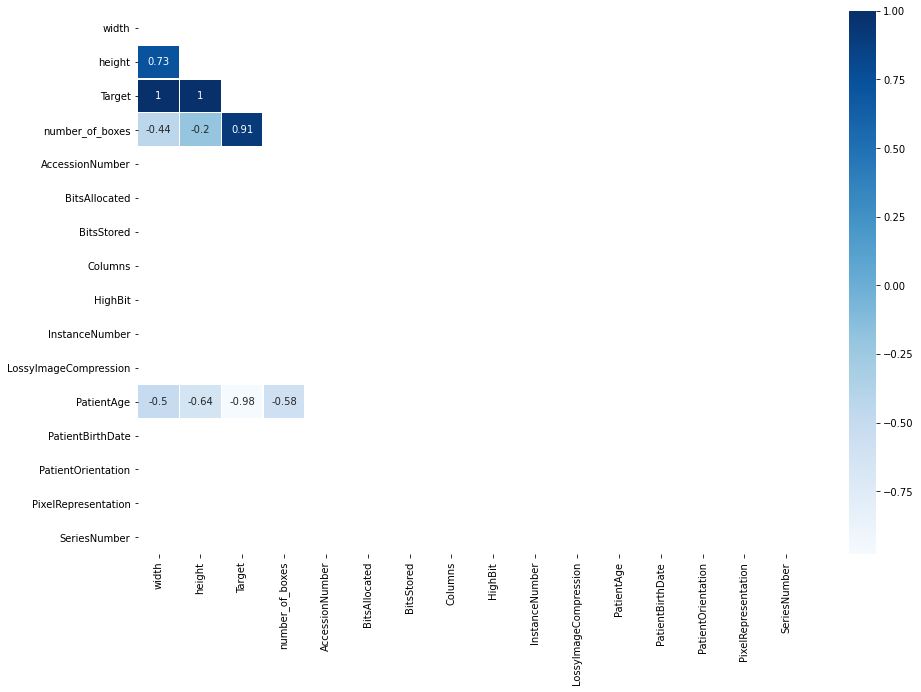

In [47]:
#Plotting Heat Map
plt.figure(figsize=(15, 10))
# Generate a mask for the upper triangle
corr_df = df_meta_preProcess.corr()
upper_mask = np.triu(np.ones_like(corr_df, dtype=np.bool))
sns.heatmap(corr_df.corr(),annot=True, linewidths=.5,center=0,cmap="Blues",mask=upper_mask)
plt.show()

#### Observation:
* Number of boxes are highly correlated with Target
* Patient age is negatively correlated with Target
* Height and Width are positively correlated with Target

In [48]:
df_meta_preProcess = df_meta_preProcess.drop(['height','width'],axis=1)

In [49]:
df_meta_preProcess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Target                 30227 non-null  int64  
 1   number_of_boxes        30227 non-null  int64  
 2   AccessionNumber        0 non-null      float64
 3   BitsAllocated          30227 non-null  float64
 4   BitsStored             30227 non-null  float64
 5   Columns                30227 non-null  float64
 6   HighBit                30227 non-null  float64
 7   InstanceNumber         30227 non-null  float64
 8   LossyImageCompression  30227 non-null  int64  
 9   PatientAge             30227 non-null  int64  
 10  PatientBirthDate       0 non-null      float64
 11  PatientOrientation     0 non-null      float64
 12  PatientSex             30227 non-null  object 
 13  PixelRepresentation    30227 non-null  float64
 14  SeriesNumber           30227 non-null  float64
 15  Vi

### 6.3. Finding Feature Importance

In [50]:
#Function to get the feature importane using LGBMClassifiers
def fast_lgbm_cv_scores(df, target, task, rs = 0):
    
    clf = LGBMClassifier(n_estimators = 10000, nthread = 4, random_state = rs)
    metric = 'auc'

    # Cross validation model
    folds = KFold(n_splits = 10, shuffle = True, random_state = rs)
        
    # Create arrays and dataframes to store results
    pred = np.zeros(df.shape[0])
    
    feats = df.columns.drop(target)
    
    feature_importance_df = pd.DataFrame(index = feats)
    
    for n_fold, (train_idx, valid_idx) in enumerate(folds.split(df[feats], df[target])):
        train_x, train_y = df[feats].iloc[train_idx], df[target].iloc[train_idx]
        valid_x, valid_y = df[feats].iloc[valid_idx], df[target].iloc[valid_idx]

        clf.fit(train_x, train_y, 
                eval_set = [(valid_x, valid_y)], eval_metric = metric, 
                verbose = -1, early_stopping_rounds = 100)

        pred[valid_idx] = clf.predict_proba(valid_x, num_iteration = clf.best_iteration_)[:, 1]
        
        feature_importance_df[n_fold] = pd.Series(clf.feature_importances_, index = feats)
        
        del train_x, train_y, valid_x, valid_y
        gc.collect()

    return feature_importance_df, pred, roc_auc_score(df[target], pred)

In [51]:
df_meta_preProcess['PatientAge'] = df_meta_preProcess['PatientAge'].astype(int)
df_meta_preProcess['PatientSex'].astype('category')
df_meta_preProcess['ViewPosition'].astype('category')
df_meta_preProcess['PatientSex'] = np.where(df_meta_preProcess["PatientSex"].str.contains("M"), 1, 0)
df_meta_preProcess['ViewPosition'] = np.where(df_meta_preProcess["ViewPosition"].str.contains("AP"), 1, 0)

In [52]:
f_imp, _, score = fast_lgbm_cv_scores(df_meta_preProcess,target = 'Target', task = 'classification')
print('ROC-AUC for Target = {}'.format(score))

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[12]	valid_0's auc: 0.903624	valid_0's binary_logloss: 0.324796
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[15]	valid_0's auc: 0.915926	valid_0's binary_logloss: 0.30013
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[57]	valid_0's auc: 0.896651	valid_0's binary_logloss: 0.257645
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[14]	valid_0's auc: 0.899944	valid_0's binary_logloss: 0.317071
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[29]	valid_0's auc: 0.897842	valid_0's binary_logloss: 0.276563
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[2]	valid_0's auc: 0.914901	valid_0's binary_logloss: 0.511777
Training until validation scor

In [53]:
f_imp

,0,1,2,3,4,5,6,7,8,9
number_of_boxes,12,15,57,14,29,2,102,67,8,3
AccessionNumber,0,0,0,0,0,0,0,0,0,0
BitsAllocated,0,0,0,0,0,0,0,0,0,0
BitsStored,0,0,0,0,0,0,0,0,0,0
Columns,0,0,0,0,0,0,0,0,0,0
HighBit,0,0,0,0,0,0,0,0,0,0
InstanceNumber,0,0,0,0,0,0,0,0,0,0
LossyImageCompression,0,0,0,0,0,0,0,0,0,0
PatientAge,285,365,1374,341,701,47,2096,1504,178,69
PatientBirthDate,0,0,0,0,0,0,0,0,0,0


In [54]:
f_imp, _, score = fast_lgbm_cv_scores(df_meta_preProcess[['Target','PatientAge','PatientSex','ViewPosition']],target = 'Target', task = 'classification')
print('ROC-AUC for Target = {}'.format(score))

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[87]	valid_0's auc: 0.750701	valid_0's binary_logloss: 0.527231
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[18]	valid_0's auc: 0.773017	valid_0's binary_logloss: 0.519082
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[40]	valid_0's auc: 0.746179	valid_0's binary_logloss: 0.527552
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[67]	valid_0's auc: 0.755177	valid_0's binary_logloss: 0.528886
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[28]	valid_0's auc: 0.74384	valid_0's binary_logloss: 0.539555
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[29]	valid_0's auc: 0.77512	valid_0's binary_logloss: 0.509203
Training until validation scor

In [55]:
f_imp

,0,1,2,3,4,5,6,7,8,9
PatientAge,1973,463,988,1605,704,742,1731,1195,1448,535
PatientSex,426,59,172,278,108,99,323,225,277,74
ViewPosition,211,18,40,127,28,29,166,50,105,21


#### Observation:
* From the above table we could see PatientAge, PatientSex, ViewPosition has more importance 

# 7. Data Loading

In [56]:
meta_df = df_meta.copy(deep=True)

In [59]:
#Selecting only required features 
processed_df = meta_df[['patientId','x','y','width','height','Target','number_of_boxes','class','PatientSex','ViewPosition','PatientAge']]

In [62]:
processed_df= processed_df.merge(loaded_images_df, on = 'patientId', how = 'left')

In [ ]:
processed_df.head()

,patientId,x,y,width,height,Target,number_of_boxes,class,PatientSex,ViewPosition,PatientAge,path
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,1,No Lung Opacity / Not Normal,F,PA,51,/content/drive/My Drive/GL_AI_ML/Assignments/C...
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,1,No Lung Opacity / Not Normal,F,PA,48,/content/drive/My Drive/GL_AI_ML/Assignments/C...
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,1,No Lung Opacity / Not Normal,M,AP,19,/content/drive/My Drive/GL_AI_ML/Assignments/C...
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,1,Normal,M,PA,28,/content/drive/My Drive/GL_AI_ML/Assignments/C...
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,2,Lung Opacity,F,AP,32,/content/drive/My Drive/GL_AI_ML/Assignments/C...


#### 7.2. Save the updated dataframe

In [ ]:
print('Saving the updated dataframe for further usage.......');
processed_df.to_pickle('./output/processed_data.pkl')

Saving the updated dataframe for further usage.......


#### 7.3. Load the dataframe from the stored file

In [68]:
#Load the dataset from the pickle file
print('Loading the dataframe from the saved file')
source_df = pd.read_pickle('./output/processed_data.pkl')
source_df.shape

Loading the dataframe from the saved file


(30227, 12)

### Observation :
* After Merging the images path, we have 11 features and 1 target
* We will be using the <b>source_df</b> as the dataset

# 8. Data Analysis

In [69]:
source_df.head()

,patientId,x,y,width,height,Target,number_of_boxes,class,PatientSex,ViewPosition,PatientAge,path
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,1,No Lung Opacity / Not Normal,F,PA,51,/content/drive/My Drive/GL_AI_ML/Assignments/C...
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,1,No Lung Opacity / Not Normal,F,PA,48,/content/drive/My Drive/GL_AI_ML/Assignments/C...
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,1,No Lung Opacity / Not Normal,M,AP,19,/content/drive/My Drive/GL_AI_ML/Assignments/C...
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,1,Normal,M,PA,28,/content/drive/My Drive/GL_AI_ML/Assignments/C...
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,2,Lung Opacity,F,AP,32,/content/drive/My Drive/GL_AI_ML/Assignments/C...


#### 8.1. Statistical summary of the data

In [ ]:
source_df.describe().T

,count,mean,std,min,25%,50%,75%,max
x,9555.0,394.047724,204.574172,2.0,207.0,324.0,594.0,835.0
y,9555.0,366.839560,148.940488,2.0,249.0,365.0,478.5,881.0
width,9555.0,218.471376,59.289475,40.0,177.0,217.0,259.0,528.0
height,9555.0,329.269702,157.750755,45.0,203.0,298.0,438.0,942.0
Target,30227.0,0.316108,0.464963,0.0,0.0,0.0,1.0,1.0
number_of_boxes,30227.0,1.244880,0.467829,1.0,1.0,1.0,1.0,4.0
PatientAge,30227.0,46.797764,16.892940,1.0,34.0,49.0,59.0,155.0


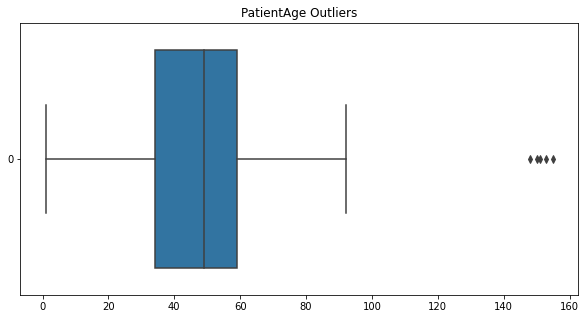

In [ ]:
fig = plt.figure(figsize = (10, 5))
fig_box_plot = sns.boxplot(data = source_df['PatientAge'], orient = 'h').set_title('PatientAge Outliers')

#### Observation :
* There are outliers in Patient Age

#### 8.2. Distribution of Pneumonia across the Patient's Age

In [ ]:
#Age
p_flag_0 =source_df[source_df["Target"] == 0]['PatientAge']
p_flag_1 = source_df[source_df["Target"] == 1]['PatientAge']

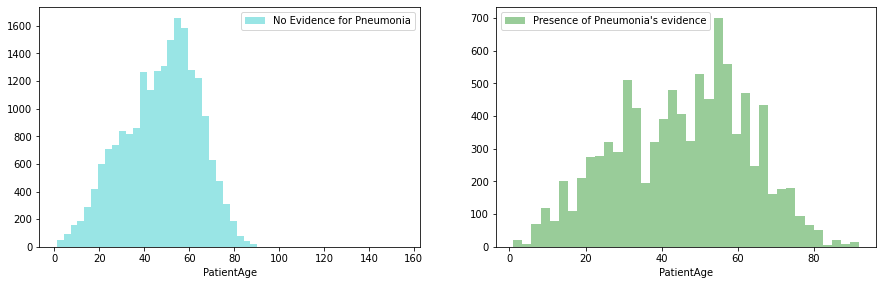

In [ ]:
plt.figure(figsize=(15, 15))
#Plotting Age group
plt.subplot(3,2,1)
sns.distplot(p_flag_0, color = 'c',label='No Evidence for Pneumonia',kde=False)
plt.legend()
plt.subplot(3,2,2)
sns.distplot(p_flag_1, color = 'g',label='Presence of Pneumonia\'s evidence',kde=False)
plt.legend()
plt.show()

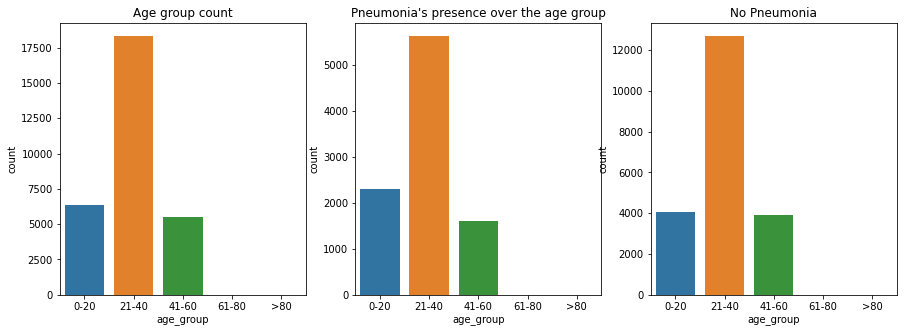

In [ ]:
age_grp_df= source_df.copy(deep=True)
age_grp_df['age_group'] = pd.cut(age_grp_df['PatientAge'], bins = 5, precision = 0, labels = ['0-20', '21-40', '41-60', '61-80','>80'])
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.countplot(x = age_grp_df['age_group']).set_title('Age group count')
plt.subplot(1,3,2)
sns.countplot(x= age_grp_df.loc[(age_grp_df['Target'] == 1), 'age_group']).set_title('Pneumonia\'s presence over the age group')
plt.subplot(1,3,3)
sns.countplot(x= age_grp_df.loc[(age_grp_df['Target'] == 0), 'age_group']).set_title('No Pneumonia')
plt.show()

In [ ]:
print('Total count against the age group...\n',pd.DataFrame(age_grp_df['age_group'].value_counts().sort_index()))
print('Total Pneumonia evidence...\n',pd.DataFrame(age_grp_df[age_grp_df['Target']==1]['age_group'].value_counts().sort_index()))
print('Total No Pneumonia ...\n',pd.DataFrame(age_grp_df[age_grp_df['Target']==0]['age_group'].value_counts().sort_index()))

Total count against the age group...
        age_group
0-20        6368
21-40      18324
41-60       5530
61-80          0
>80            5
Total Pneumonia evidence...
        age_group
0-20        2298
21-40       5639
41-60       1618
61-80          0
>80            0
Total No Pneumonia ...
        age_group
0-20        4070
21-40      12685
41-60       3912
61-80          0
>80            5


#### 8.3. Distribution of Pneumonia across the Gender

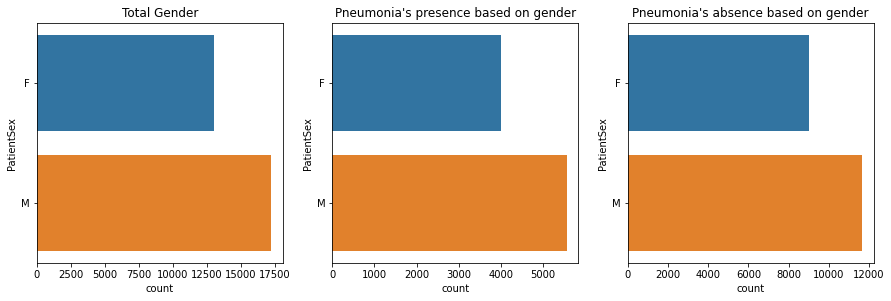

In [ ]:
plt.figure(figsize=(15, 15))
#Plotting Gender
plt.subplot(3,3,1)
sns.countplot(y = source_df['PatientSex']).set_title('Total Gender')
plt.subplot(3,3,2)
sns.countplot(y = source_df.loc[(source_df['Target'] == 1), 'PatientSex']).set_title('Pneumonia\'s presence based on gender')
plt.subplot(3,3,3)
sns.countplot(y = source_df.loc[(source_df['Target'] == 0), 'PatientSex']).set_title('Pneumonia\'s absence based on gender')
plt.show()


#### 8.4. Distribution of Pneumonia based on ViewPosition (VP/PA)

##### (Anterior/Posterior) and PA (Posterior/Anterior). These type of X-rays are mostly used to obtain the front-view. Apart from front-view, a lateral image is usually taken to complement the front-view.

* Posterior/Anterior (PA): In PA, X-Ray beam hits the posterior (back) part of the chest before the anterior (front) part. While obtaining the image patient is asked to stand with their chest against the film.
* Anterior/Posterior (AP): Sometimes it's not possible for radiographers to acquire a PA chest X-ray. This is usually because the patient will not be in position to stand due to illness. AP projection images are of lower quality than PA images. Heart size is exaggerated (cardiothoracic ratio approximately 50%)

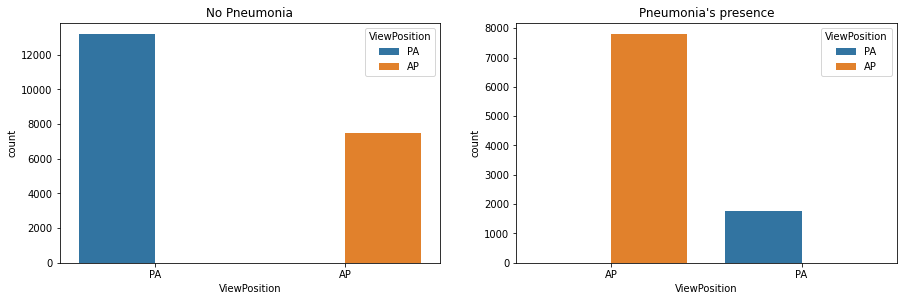

In [ ]:
#ViewPosition = AP/VP
vp_flag_0 =source_df[source_df["Target"] == 0]['ViewPosition']
vp_flag_1 = source_df[source_df["Target"] == 1]['ViewPosition']
plt.figure(figsize=(15, 15))
plt.subplot(3,2,1)
sns.countplot(vp_flag_0,hue=source_df['ViewPosition']).set_title('No Pneumonia')
plt.subplot(3,2,2)
sns.countplot(vp_flag_1,hue=source_df['ViewPosition']).set_title('Pneumonia\'s presence')
plt.show()

# 9. Displaying DICOM Images along with the boundary boxes

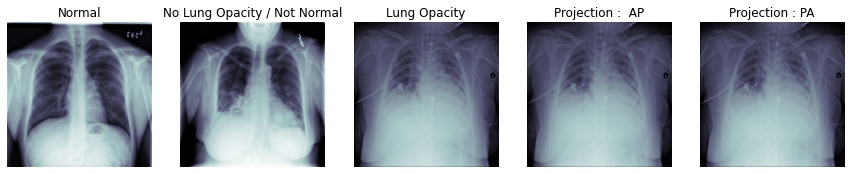

In [ ]:
normal_img = source_df.loc[source_df['class'] == 'Normal'].iloc[0]
not_normal_img = source_df.loc[source_df['class'] == 'No Lung Opacity / Not Normal'].iloc[0]
opacity_img = source_df.loc[source_df['class'] == 'Lung Opacity'].iloc[1]
ap_img = source_df.loc[(source_df['ViewPosition'] == 'AP')].iloc[0]
pa_img = source_df.loc[(source_df['ViewPosition'] == 'PA')].iloc[0]
dcm1 = dcm.dcmread(normal_img['path'])
dcm2 = dcm.dcmread(not_normal_img['path'])
dcm3 = dcm.dcmread(opacity_img['path'])
dcm4 = dcm.dcmread(ap_img['path'])
dcm5 = dcm.dcmread(ap_img['path'])

f, ((ax1, ax2, ax3, ax4, ax5)) = plt.subplots(1, 5, figsize = (15, 8))
ax1.imshow(dcm1.pixel_array, cmap = plt.cm.bone)
ax1.set_title('Normal')
ax1.axis('off')
ax2.imshow(dcm2.pixel_array, cmap = plt.cm.bone)
ax2.set_title('No Lung Opacity / Not Normal')
ax2.axis('off')
ax3.imshow(dcm3.pixel_array, cmap = plt.cm.bone)
ax3.set_title('Lung Opacity')
ax3.axis('off')
ax4.imshow(dcm3.pixel_array, cmap = plt.cm.bone)
ax4.set_title('Projection :  AP')
ax4.axis('off')

ax5.imshow(dcm3.pixel_array, cmap = plt.cm.bone)
ax5.set_title('Projection : PA')
ax5.axis('off')

plt.show()

In [98]:
# Function to plot masks over the DICOM Image
def plot_box_in_dicom_images(data, df, img_path):
    img_data = list(data.T.to_dict().values())
    f, ax = plt.subplots(3, 3, figsize = (16, 18))
    for i, row in tqdm_notebook(enumerate(img_data)):
        image = row['patientId'] + '.dcm'
        path = os.path.join(img_path, image)
        data = dcm.read_file(path)
        rows = df[df['patientId'] == row['patientId']]
        age = rows.PatientAge.unique().tolist()[0]
        sex = data.PatientSex        
        vp = data.ViewPosition       
        data_img = dcm.dcmread(path)
        ax[i//3, i%3].imshow(data_img.pixel_array, cmap = plt.cm.bone)
        ax[i//3, i%3].axis('off')
        ax[i//3, i%3].set_title('PID: {}\nAge: {}, Sex: {}, VP: {},\nTarget: {}, \n Class: {}\nWindow: {}:{}:{}:{}'\
                              .format(row['patientId'], age, sex,
                                      vp, row['Target'], 
                                      row['class'], row['x'], 
                                      row['y'], row['width'],
                                      row['height']))
        box_data = list(rows.T.to_dict().values())
        for j, row in enumerate(box_data):
            ax[i//3, i%3].add_patch(Rectangle(xy = (row['x'], row['y']),
                      width = row['width'], height = row['height'], 
                      color = 'red', alpha = 0.15)) 
    plt.show()

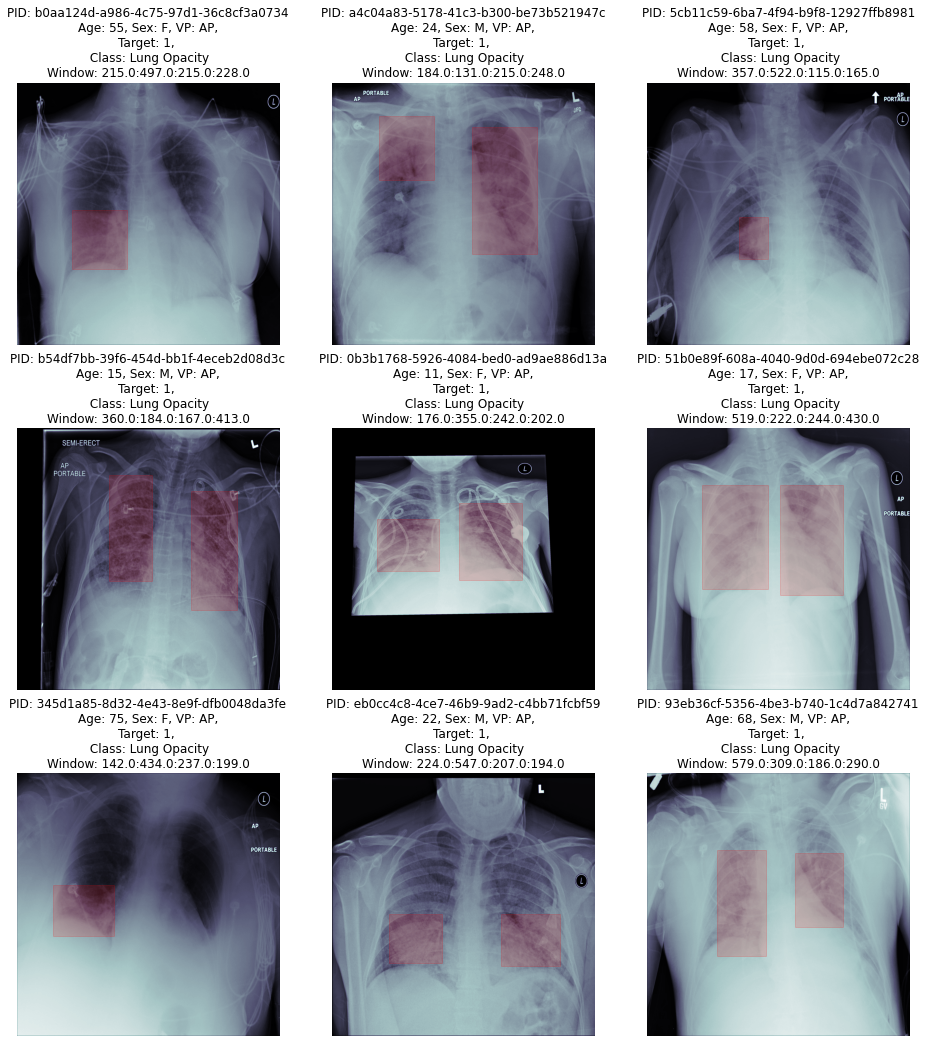

In [99]:
IMG_PATH=projectFolder+"/"+dataSetFolder+"/"+train_img_folder
plot_box_in_dicom_images(data = source_df.loc[(source_df['Target'] == 1)].sample(9), 
                  df = source_df, img_path = IMG_PATH)

# 10. Data Preprocessing for model building